The dataset for this homework exercise is borrowed from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).

In [1]:
import pandas as pd

In [2]:
'''
# this code was used to read two separate datasets from UCI Machine Learning repo and combine them to create one consolidated data set.

df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
df_white['wine type'] = 'White'

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_red['wine type'] = 'Red'

df = pd.concat([df_white, df_red], axis=0)

df.to_csv(r'../data/winequality.csv')
'''

"\n# this code was used to read two separate datasets from UCI Machine Learning repo and combine them to create one consolidated data set.\n\ndf_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')\ndf_white['wine type'] = 'White'\n\ndf_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')\ndf_red['wine type'] = 'Red'\n\ndf = pd.concat([df_white, df_red], axis=0)\n\ndf.to_csv(r'../data/winequality.csv')\n"

Read data.

In [3]:
# read data from the csv file, ignore the first (index) column while reading data in

df = pd.read_csv(r'../data/winequality.csv', index_col=0)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


### 1. Plot histograms for all variables in this data set. Add a vertical line to show the average value of each variable. Add a chart title for each chart.

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 9))
fig.tight_layout()

for i, ax in enumerate(axes.flat):
    col = df.columns[i]
    df[col].hist(bins=50, ax=ax, grid=False, color='royalblue')
    ax.axvline(x=df[col].mean(), color='tomato')
    ax.set_title(col.upper(), weight='bold', size=10)
    
plt.show();

<Figure size 1200x900 with 12 Axes>

### 2. Identify two features that are most correlated with each other. Visualize their relationship using an appropriate chart type.

In [5]:
# correlation matrix
df_corr = df.corr()

# flatten the correlation matrix
df_corr = df_corr.stack().reset_index()

# rename columns
df_corr = df_corr.rename(columns={'level_0': 'var1', 'level_1': 'var2', 0: 'corr'})

# absolute correlation
df_corr['abs_corr'] = abs(df_corr['corr'])

# drop rows where var1 and var2 are the same
df_corr = df_corr[df_corr['var1'] != df_corr['var2']]

# sort values
df_corr = df_corr.sort_values(by='abs_corr', ascending=False)

# two variables with the highest absolute correlation
df_corr.loc[df_corr['abs_corr'] == max(df_corr['abs_corr'])]

,var1,var2,corr,abs_corr
77,total sulfur dioxide,free sulfur dioxide,0.720934,0.720934
66,free sulfur dioxide,total sulfur dioxide,0.720934,0.720934


In [6]:
# while it's not necessary to drop these duplicate rows, we can do that using `frozenset`

df_corr = df_corr[~df_corr[['var1', 'var2']].apply(frozenset, axis=1).duplicated()]

# two variables with the highest absolute correlation

df_corr.loc[df_corr['abs_corr'] == max(df_corr['abs_corr'])]

,var1,var2,corr,abs_corr
77,total sulfur dioxide,free sulfur dioxide,0.720934,0.720934


Scatter plot for the two most correlated variables.

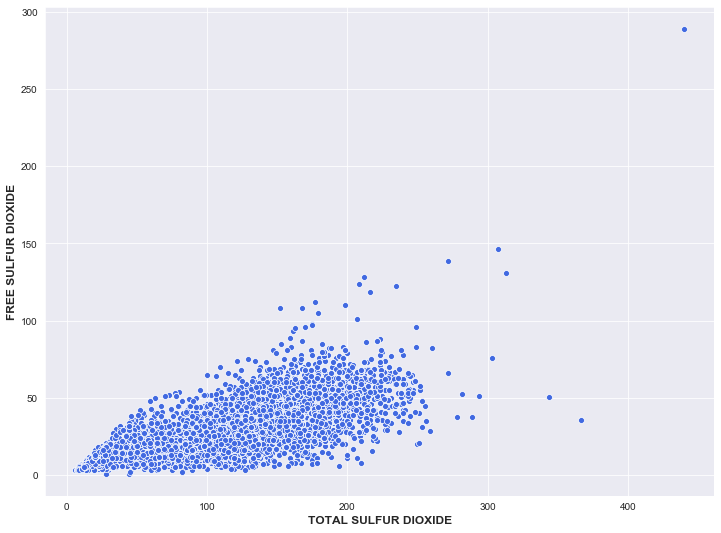

In [7]:
plt.figure(figsize=[12, 9])
sns.set_style('darkgrid')

ax = sns.scatterplot(x='total sulfur dioxide', y='free sulfur dioxide', data=df, color='royalblue')

plt.xlabel('TOTAL SULFUR DIOXIDE', fontsize=12, weight='bold')
plt.ylabel('FREE SULFUR DIOXIDE', fontsize=12, weight='bold');

### 3. Identify the feature that is most correlated with the wine quality and plot their relationship using an appropriate chart type.

In [8]:
df_corr[df_corr['var1'] == 'quality'].sort_values(by='abs_corr', ascending=False)

,var1,var2,corr,abs_corr
142,quality,alcohol,0.444319,0.444319
139,quality,density,-0.305858,0.305858
134,quality,citric acid,0.085532,0.085532
132,quality,fixed acidity,-0.076743,0.076743
137,quality,free sulfur dioxide,0.055463,0.055463
138,quality,total sulfur dioxide,-0.041385,0.041385
135,quality,residual sugar,-0.036980,0.036980
140,quality,pH,0.019506,0.019506


The feature most correlation with `quality`:

In [9]:
most_corr_with_y = df_corr[df_corr['var1'] == 'quality'].sort_values(by='abs_corr', ascending=False).head(1)['var2'].values[0]

most_corr_with_y

'alcohol'

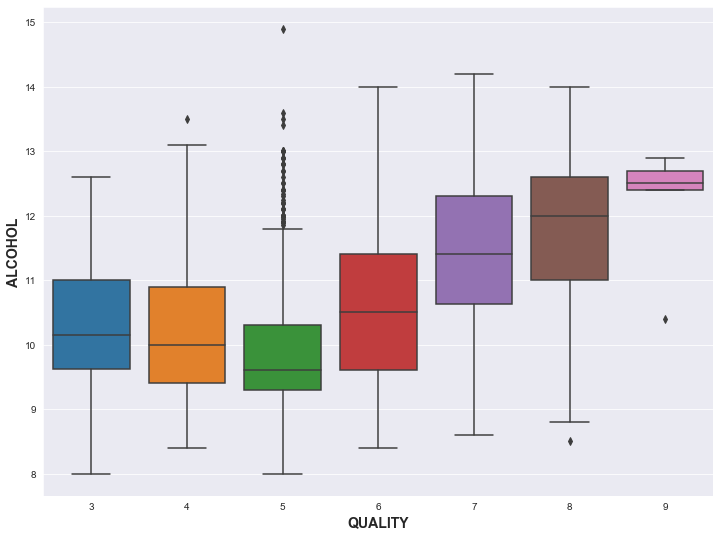

In [10]:
plt.figure(figsize=[12, 9])
sns.set_style('darkgrid')

sns.boxplot(x='quality', y=most_corr_with_y, data=df)

plt.xlabel('QUALITY', fontsize=14, weight='bold')
plt.ylabel('ALCOHOL', fontsize=14, weight='bold')

plt.show();

### 4. Calcuate average alcohol content for each wine quality score. Store the average alcohol content for the best quality wine in a variable called `avg_alcohol_for_best_wine` and print it using the following statement:

`print(f'The average alcohol content for best wine is {avg_alcohol_for_best_wine}.')`

In [11]:
# avg density by quality

df.groupby(['quality'])['alcohol'].mean()

quality
3    10.215000
4    10.180093
5     9.837783
6    10.587553
7    11.386006
8    11.678756
9    12.180000
Name: alcohol, dtype: float64

In [12]:
# average density for the best wine
avg_alcohol_for_best_wine = df[df['quality'] == df.quality.max()]['alcohol'].mean()

print(f'The average alcohol content for best wine is {avg_alcohol_for_best_wine}.')

The average alcohol content for best wine is 12.18.


### 5. Calculate correlation coefficients between wine quality and all other features _separately for each wine type_. Identify any one feature that has contradictory relationships across the wine type. (For example, a feture has positive correlation with the wine quality for red wines, and negative correlation coefficients with the wine quality of white wines.) Plot the relationship of the selected feature with wine quality using an appropriate chart type.

In [13]:
corr_with_quality_red, corr_with_quality_white = [], []

df_red = df[df['wine type'] == 'Red']
df_white = df[df['wine type'] == 'White']

for col in df.columns[:-1]:
    corr_with_quality_red.append(df_red['quality'].corr(df[col]))
    corr_with_quality_white.append(df_white['quality'].corr(df[col]))
    
# create a dataframe to store the results
df_corr_diff = pd.DataFrame(columns=['feature', 'corr_red', 'corr_white'])

df_corr_diff['feature'] = df.columns[:-1].values
df_corr_diff['corr_red'] = corr_with_quality_red
df_corr_diff['corr_white'] = corr_with_quality_white

# let's select only those rows where the correlations are contradictory 
#  i.e., have the opposite signs
df_corr_diff = df_corr_diff[df_corr_diff['corr_red'] * df_corr_diff['corr_white'] < 0]

df_corr_diff

,feature,corr_red,corr_white
0,fixed acidity,0.062025,-0.054607
2,citric acid,0.117377,-0.010085
3,residual sugar,0.017757,-0.081373
5,free sulfur dioxide,-0.038301,0.004333
8,pH,-0.010949,0.070009


Let's pick `pH` from this list and visualize its relationship with `quality`.

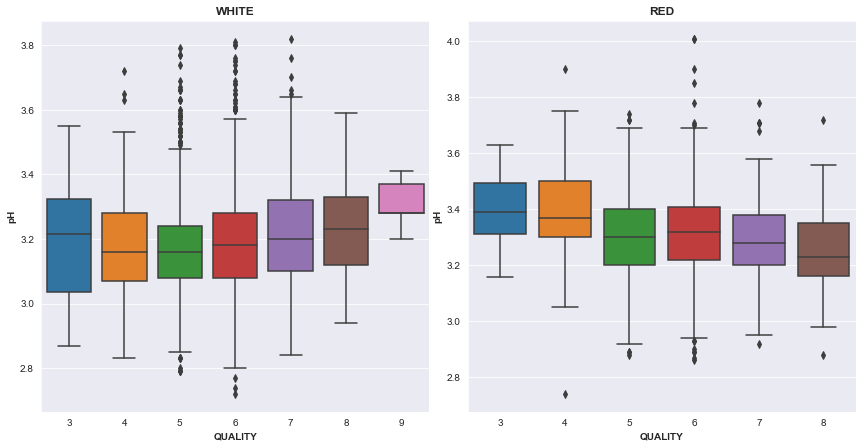

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.tight_layout()

wine_types = df['wine type'].unique()

for i, ax in enumerate(axes.flat):
    wine_type = wine_types[i]
    sns.boxplot(x='quality', y='pH', data=df[df['wine type'] == wine_type], ax=ax)
    ax.set_title(wine_type.upper(), weight='bold', size=12)
    ax.set_xlabel('QUALITY', fontsize=10, weight='bold')
    ax.set_ylabel('pH', fontsize=10, weight='bold')
    
plt.show();